### 模拟2个正态分布的均值预计

In [1]:
import math
import copy
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#要给定一个初始值
def init_data(Sigma, Mu1, Mu2, k, N):
    """
    Sigma:均方差
    mu1, mu2:各高斯模型的期望
    k: 几个高斯模型
    N: 数据量
    """
    global X
    global Mu
    global Expectations#初始化期望
    
    X = np.zeros((1, N))
    Mu = np.random.random(2)
    Expectations = np.zeros((N, k))
    
    #制造数据分布
    for i in range(0, N):
        if np.random.random(1) > 0.5:
            X[0, i] = np.random.normal()*Sigma + Mu1
        else:
            X[0, i] = np.random.normal()*Sigma + Mu2
            
#     print("初始化的数据 : {}".format(X))
    
def e_step(Sigma, k, N):
    """
    计算期望
    """
    global Expectations
    global Mu
    global X
    
    for i in range(0, N):#遍历数据点
        Denom = 0
        #计算总和
        for j in range(0, k):
            Denom += math.exp((-1/(2 * float(Sigma**2)))*(float(X[0, i]-Mu[j])**2))
        #计算部分
        for j in range(0, k):
            
            Numer = math.exp((-1/(2 * float(Sigma**2)))*(float(X[0, i]-Mu[j])**2))
            
            Expectations[i, j] = Numer / Denom
            
#     print("期望: {}".format(Expectations))
    
    
def m_step(k, N):
    """
    计算期望最大化参数
    """
    global Expectations
    global X
    
    for j in range(0, k):
        Numer = 0
        Denom = 0
        for i in range(0, N):
            Numer += Expectations[i, j] * X[0, i]
            Denom += Expectations[i, j]
        Mu[j] = Numer / Denom
        
        
def run(Sigma, Mu1, Mu2, k, N, inter_num, Epsilon):
    init_data(Sigma, Mu1, Mu2, k, N)
    Ex1 = []
    Ex2 = []
    
    for i in range(inter_num):
        Old_Mu = copy.deepcopy(Mu)
        e_step(Sigma, k, N)
        m_step(k,N)
        print("迭代 :{}, 期望 : {}".format(i, Mu))
        if sum(abs(Mu-Old_Mu)) < Epsilon:
            
            break
            
        Ex1.append(Mu[0])
        Ex2.append(Mu[1])
    return Ex1, Ex2, i

迭代 :0, 期望 : [29.07639517 30.70652935]
迭代 :1, 期望 : [27.03998513 33.00677396]
迭代 :2, 期望 : [22.24824052 37.74759007]
迭代 :3, 期望 : [20.04139625 39.84305734]
迭代 :4, 期望 : [19.83668079 39.99429355]
迭代 :5, 期望 : [19.81643366 39.99322859]
迭代 :6, 期望 : [19.81170225 39.98959967]
迭代 :7, 期望 : [19.81001442 39.98801334]
迭代 :8, 期望 : [19.80936209 39.98738368]
迭代 :9, 期望 : [19.80910712 39.98713668]
迭代 :10, 期望 : [19.80900732 39.98703995]
迭代 :11, 期望 : [19.80896824 39.98700208]


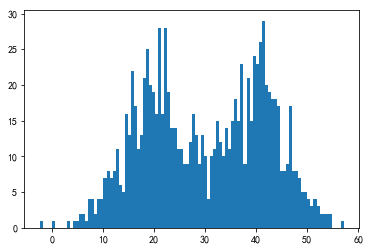

In [3]:
Ex1, Ex2, iter_num = run(6, 40, 20, 2, 1000, 1000, 0.0001)
X_num = np.arange(0, iter_num, 1)
plt.hist(X[0, :], 100)
# plt.plot(X[0,:])
plt.show()

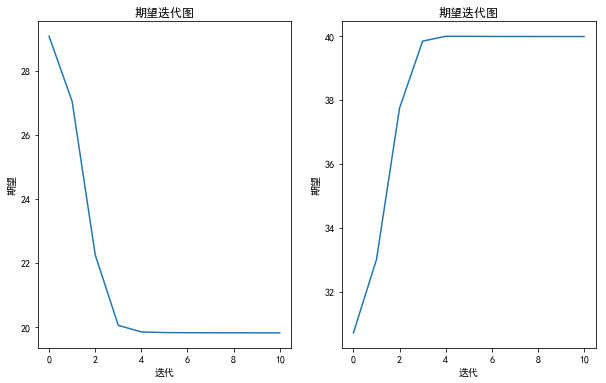

In [4]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(X_num, Ex1)
plt.xlabel("迭代")
plt.ylabel("期望")
plt.title("期望迭代图")
plt.savefig("Ex1")

plt.subplot(122)
plt.plot(X_num, Ex2)
plt.xlabel("迭代")
plt.ylabel("期望")
plt.title("期望迭代图")
plt.savefig("Ex2")